# Health Sites Near You
Name: Thea Ellen Go<br>
Section: S12

### How many health-related amenities are there in provinces where you, your family, and relatives are currently residing in?

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('seaborn-whitegrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [2]:
ph = gpd.read_file('./datasets/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [3]:
healthsites = gpd.read_file( './datasets/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [4]:
data = pd.read_csv('./datasets/westernvisayas.csv')
data = data.append(pd.read_csv('./datasets/centralvisayas.csv'))
data = data.append(pd.read_csv('./datasets/ncr.csv'))
data.head()

,"Date and Time Downloaded : 05/04/2021 03:44:00 pm""Health Facility Code""",Health Facility Code Short,Facility Name,Old Health Facility Names,Old Health Facility Name 2,Old Health Facility Name 3,Health Facility Type,Ownership Major Classification,Ownership Sub-Classification for Government facilities,Ownership Sub-Classification for private facilities,...,Official Website,Facility Head: Last Name,Facility Head: First Name,Facility Head: Middle Name,Facility Head: Position,Hospital Licensing Status,Service Capability,Bed Capacity,"Date and Time Downloaded : 05/04/2021 04:31:14 pm""Health Facility Code""","Date and Time Downloaded : 05/04/2021 04:29:42 pm""Health Facility Code"""
0,DOH000000000000003,3,DON LEOVIGILDO N. DIAPO SR. MUNICIPAL HOSPITAL,NaN,NaN,NaN,Infirmary,Government,Local Government Unit,NaN,...,NaN,FUENTES,STEVENS,NaN,Chief of Hospital,With License,NaN,10.0,NaN,NaN
1,DOH000000000000014,14,TOBIAS FORNIER RURAL HEALTH UNIT,NaN,NaN,NaN,Rural Health Unit,Government,Local Government Unit,NaN,...,NaN,RUBINOS,ENCARNACION,A.,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN
2,DOH000000000000040,40,MIAG-AO RURAL HEALTH UNIT,NaN,NaN,NaN,Rural Health Unit,Government,Local Government Unit,NaN,...,NaN,GELLADA,JESSEL,COLLADA,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN
3,DOH000000000000041,41,TANGALAN RURAL HEALTH UNIT,NaN,NaN,NaN,Rural Health Unit,Government,Local Government Unit,NaN,...,NaN,FUENTES,SUMNER,TOSCO,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN
4,DOH000000000000055,55,BATAN RURAL HEALTH UNIT,,,,Rural Health Unit,Government,Local Government Unit,,...,,REFOL,KATHRYNE,B.,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN


### Projections

In [5]:
ph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
healthsites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Clean Data

Drop Unecessary Columns

In [7]:
ph = ph[['NAME_1', 'geometry']]
ph = ph.rename(columns={'NAME_1':'province'})
ph.head()

,province,geometry
0,Abra,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,Agusan del Norte,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,Agusan del Sur,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,Aklan,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,Albay,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [8]:
healthsites = healthsites.rename(columns={'addr_city' : 'city/municipality'})
healthsites.drop(['osm_id', 'osm_type', 'completeness', 'is_in_health_zone',
       'speciality', 'addr_street', 'operator', 'water_source', 'changeset_id',
       'insurance', 'staff_doctors', 'contact_number', 'uuid', 'electricity',
       'opening_hours', 'operational_status', 'source', 'is_in_health_area',
       'health_amenity_type', 'changeset_version', 'emergency',
       'changeset_timestamp', 'addr_housenumber', 'addr_postcode','staff_nurses', 'changeset_user',
       'wheelchair', 'beds', 'url', 'dispensing', 'healthcare',
       'operator_type', 'part_time_beds', 'tag'], axis='columns', inplace=True)
healthsites.head()

,amenity,city/municipality,name,geometry
0,pharmacy,,MedCore,POINT (122.63445 10.94470)
1,doctors,,City Health Office - Iligan City,POINT (124.24163 8.22731)
2,hospital,Tuguegarao,Cagayan Valley Medical Center,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,pharmacy,,Mercury Drug,POINT (121.02008 14.66840)
4,hospital,,Se単or Santo Ni単o Hospital,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [9]:
data = data[['Province Name', 'City/Municipality Name']]
data = data.rename(columns={'Province Name' : 'province',
                    'City/Municipality Name' : 'city/municipality'})
data = data.replace(to_replace ="NCR, CITY OF MANILA, FIRST DISTRICT (Not a Province)", value ="Metropolitan Manila")
data = data.replace(to_replace ="NCR, SECOND DISTRICT (Not a Province)", value ="Metropolitan Manila")
data = data.replace(to_replace ="NCR, THIRD DISTRICT (Not a Province)", value ="Metropolitan Manila")
data = data.replace(to_replace ="NCR, FOURTH DISTRICT (Not a Province)", value ="Metropolitan Manila")
data = data.replace(to_replace ="ILOILO", value ="Iloilo")
data = data.replace(to_replace ="CEBU", value ="Cebu")
data['province'].unique()

array(['AKLAN', 'ANTIQUE', 'Iloilo', 'CAPIZ', 'NEGROS OCCIDENTAL',
       'GUIMARAS', 'Cebu', 'BOHOL', 'NEGROS ORIENTAL', 'SIQUIJOR',
       'Metropolitan Manila'], dtype=object)

In [10]:
cities_df = data[data['province'] == 'Iloilo']
cities_df = cities_df.append(data[data['province'] == 'Cebu'])
cities_df = cities_df.append(data[data['province'] == 'Metropolitan Manila'])
cities_df.head()

,province,city/municipality
2,Iloilo,MIAGAO
5,Iloilo,SAN MIGUEL
11,Iloilo,BALASAN
17,Iloilo,BAROTAC VIEJO
20,Iloilo,BAROTAC NUEVO


Convert to Lower Case for merging

In [11]:
healthsites['city/municipality'] = healthsites['city/municipality'].str.lower()
cities_df['city/municipality'] = cities_df['city/municipality'].str.lower()

In [12]:
healthsites['city/municipality'] = healthsites['city/municipality'].str.replace(" (capital)", "")
healthsites['city/municipality'] = healthsites['city/municipality'].str.replace("city of ", "")
healthsites['city/municipality'] = healthsites['city/municipality'].str.replace(" city", "")
healthsites['city/municipality'] = healthsites['city/municipality'].str.replace("単", "ñ")
cities_df['city/municipality'] = cities_df['city/municipality'].str.replace(" (capital)", "")
cities_df['city/municipality'] = cities_df['city/municipality'].str.replace("city of ", "")
cities_df['city/municipality'] = cities_df['city/municipality'].str.replace(" city", "")
cities_df['city/municipality'] = cities_df['city/municipality'].str.replace("?", "ñ")

In [13]:
# healthsites['city/municipality'].unique() # commented out to prevent clutter

In [14]:
 # cities_df['city/municipality'].unique() # commented out to prevent clutter

Merge the datasets based on cities

In [15]:
province_df = healthsites.merge(cities_df, on='city/municipality', how='right')
province_df.head()

,amenity,city/municipality,name,geometry,province
0,hospital,miagao,Napulan Diagnostic Clinic,"POLYGON ((122.23587 10.64289, 122.23611 10.643...",Iloilo
1,pharmacy,miagao,Angelo Adeno Pharmacy and Laboratory,POINT (122.23677 10.64167),Iloilo
2,clinic,miagao,MHC Diagnostic Laboratory,POINT (122.23656 10.64153),Iloilo
3,dentist,miagao,Paguntalan Dental Clinic,POINT (122.23640 10.64226),Iloilo
4,hospital,miagao,Miagao Emergency Center,"POLYGON ((122.23493 10.64054, 122.23500 10.640...",Iloilo


### Visualize

In [16]:
mm = ph[ph.province=="Metropolitan Manila"]
ilo = ph[ph.province=="Iloilo"]
cebu = ph[ph.province=="Cebu"]

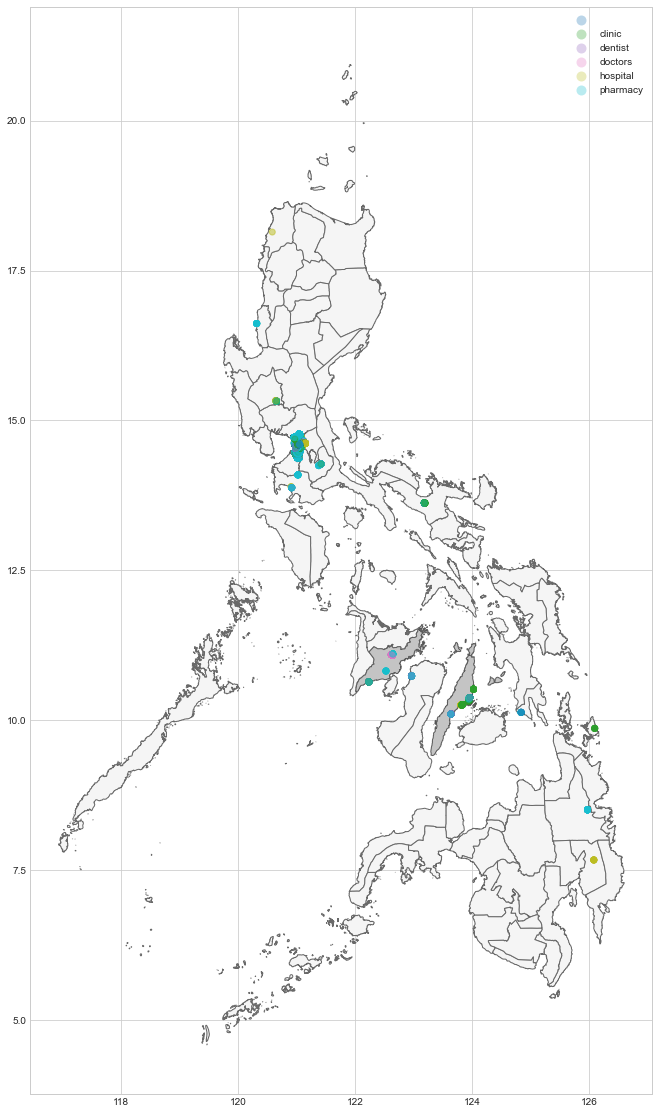

In [18]:
ax = ph.plot(figsize=(18, 20), color='whitesmoke', edgecolor='dimgray')
mm.plot(ax=ax, alpha=0.2, color='black')
ilo.plot(ax=ax, alpha=0.2, color='black')
cebu.plot(ax=ax, alpha=0.2, color='black')
province_df.plot(ax=ax, column='amenity', alpha=0.3, legend=True);